In [21]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath('..'))
from utils.preprocessing import load_data, clean_data, encode_for_eda
import utils.visualization as viz


## View a chunk of data to understand it

In [22]:
df = load_data('../data/dataset.csv')
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
print(df.describe())
df.describe(include='object')

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Data Summary Analysis

Based on the descriptive statistics above, here are the key takeaways:

1.  **Demographics**:
    *   **Gender**: The dataset is balanced between males and females.
    *   **SeniorCitizen**: Only ~16% of the customers are senior citizens.
    *   **Partner/Dependents**: Most customers do not have dependents (70%), while the split for having a partner is nearly even.

2.  **Account & Services**:
    *   **Tenure**: The average tenure is approx. 32 months. 50% of customers have stayed for fewer than 29 months.
    *   **Contract**: The most common contract type is **Month-to-month** (3875 customers), which indicates a high flexibility but potentially higher risk of churning.
    *   **Payment**: **Electronic check** is the most preferred payment method.
    *   **Services**: **PhoneService** is very common (90%). **Fiber optic** is the most frequent internet service.

3.  **Financials**:
    *   **MonthlyCharges**: The mean monthly charge is ~$64.76, ranging from $18.25 to $118.75.
    *   **TotalCharges**: The spread is large, heavily influenced by tenure (Max: ~$8684).

4.  **Target Variable (Churn)**:
    *   **Imbalance**: The dataset is imbalanced.
        *   **No Churn**: 5174 (Top class)
        *   **Churn**: 1869 (implied)
    *   This indicates that accuracy alone might not be the best metric for evaluation.

In [ ]:
clean_df = clean_data(df)

Duplicate rows found: 0
Missing values in TotalCharges: 11
customerID dropped.


c:\Users\midou\Desktop\root\study\ML\project\utils\visualization.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


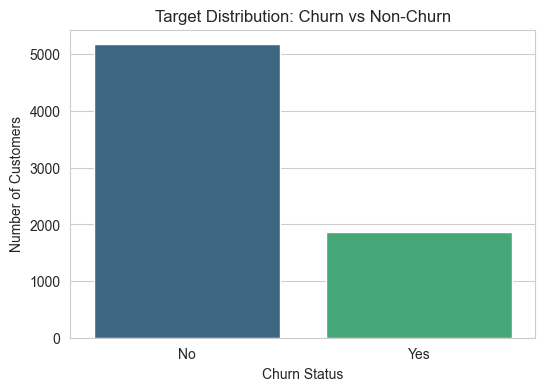

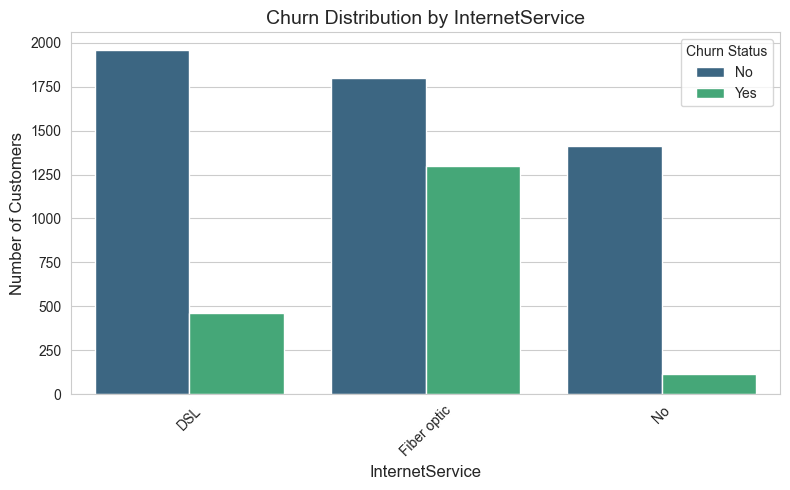

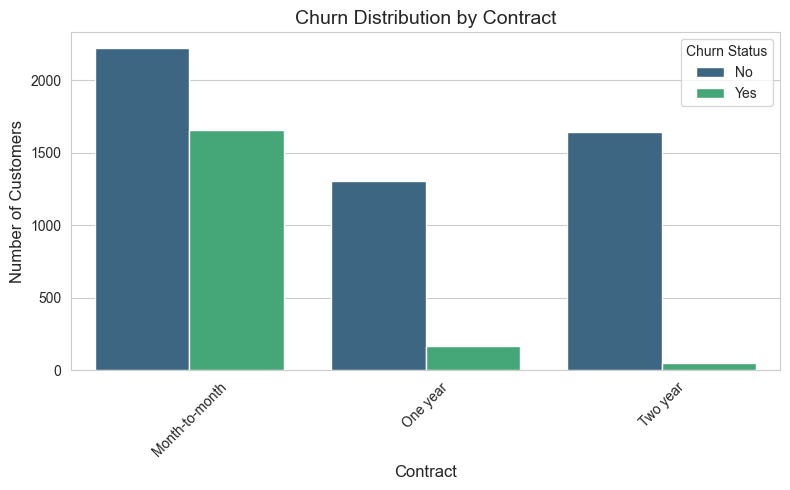

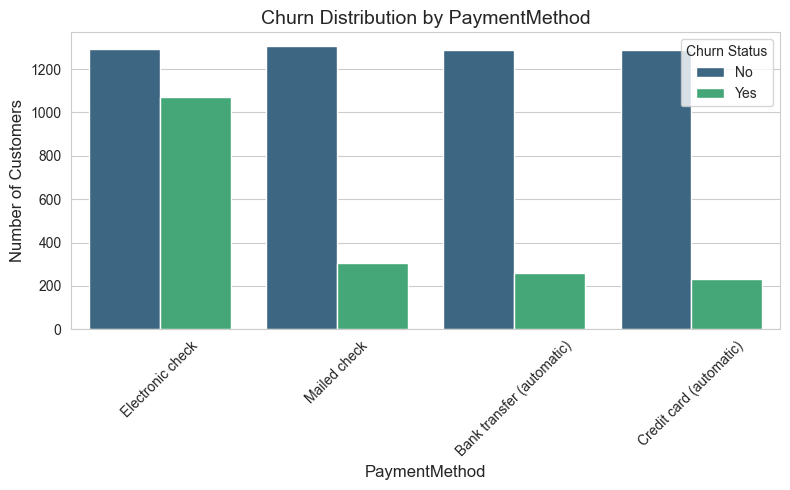

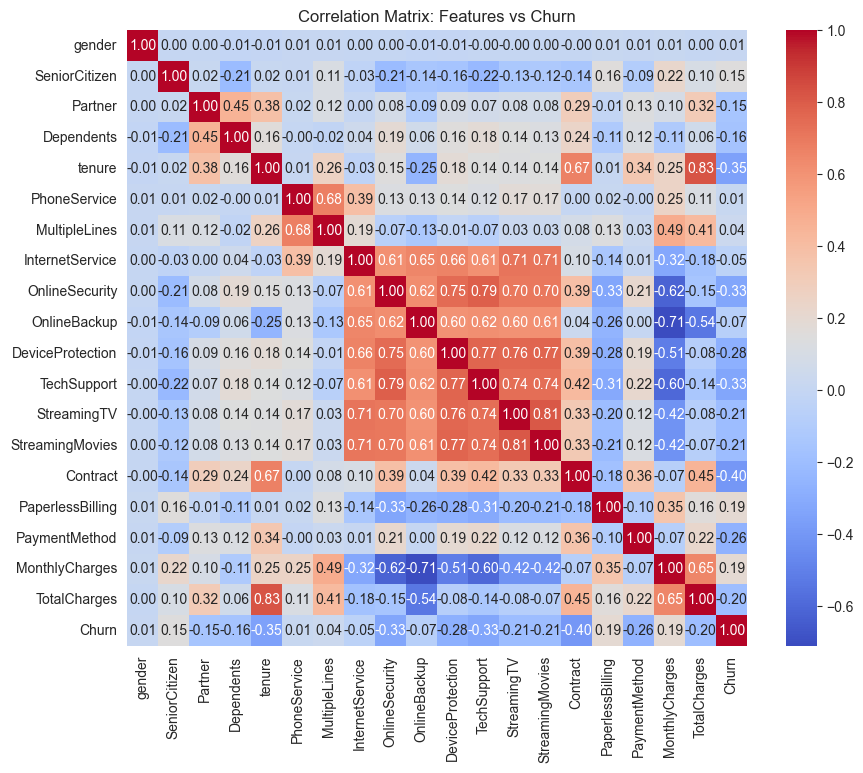

In [ ]:
viz.plot_target_distribution(clean_df)
viz.plot_categorical_distributions(clean_df, ['InternetService', 'Contract', 'PaymentMethod'])
df_eda_encoded = encode_for_eda(clean_df)

# Plot it
viz.plot_correlation_heatmap(df_eda_encoded)